In [1]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#Dollar VS Rand
USDZAR = pd.read_csv("/home/volatily/market_data/Market Data USDZAR.csv")
#US Oil
USOIL = pd.read_csv("/home/volatily/market_data/Market Data US Oil.csv")
#SA Gold
SAGOLD = pd.read_csv("/home/volatily/market_data/Market Data XAUUSD.csv")

In [3]:
USOIL

Time    Open    High     Low   Close
0      2024.07.22 10:01:00  78.309  78.363  78.302  78.353
1      2024.07.22 10:00:00  78.323  78.333  78.302  78.313
2      2024.07.22 09:59:00  78.343  78.344  78.324  78.324
3      2024.07.22 09:58:00  78.316  78.374  78.304  78.344
4      2024.07.22 09:57:00  78.325  78.335  78.304  78.315
...                    ...     ...     ...     ...     ...
9996   2024.07.11 03:53:00  81.918  81.923  81.898  81.918
9997   2024.07.11 03:52:00  81.914  81.918  81.914  81.914
9998   2024.07.11 03:51:00  81.918  81.918  81.914  81.918
9999   2024.07.11 03:50:00  81.918  81.918  81.918  81.918
10000  2024.07.11 03:49:00  81.908  81.922  81.908  81.922

[10001 rows x 5 columns]

In [148]:
#Format the data
USDZAR = USDZAR[::-1]
USOIL = USOIL[::-1]
SAGOLD = SAGOLD[::-1]

In [149]:
#Set the indexes
USOIL = USOIL.set_index("Time")
SAGOLD = SAGOLD.set_index("Time")
USDZAR = USDZAR.set_index("Time")

In [150]:
#Merge the dataframes
merged_df = pd.merge(USOIL,SAGOLD,how="inner",left_index=True,right_index=True,suffixes=(" US OIL"," SA GOLD"))
merged_df = pd.merge(merged_df,USDZAR,how="inner",left_index=True,right_index=True)

In [151]:
#Define the forecast horizon
look_ahead = 10

In [152]:
#Label the data
merged_df["Target"] = merged_df["Close"].shift(-look_ahead)
merged_df["Binary Target"] = 0
merged_df.loc[merged_df["Close"] < merged_df["Target"],"Binary Target"] = 1

In [153]:
#Drop empty rows
merged_df.dropna(inplace=True)

In [19]:
#Let's observe the correlation levels
merged_df.corr()

Open US OIL  High US OIL  Low US OIL  Close US OIL  \
Open US OIL       1.000000     0.999751    0.999752      0.999572   
High US OIL       0.999751     1.000000    0.999571      0.999767   
Low US OIL        0.999752     0.999571    1.000000      0.999770   
Close US OIL      0.999572     0.999767    0.999770      1.000000   
Open SA GOLD     -0.042501    -0.042980   -0.041724     -0.041909   
High SA GOLD     -0.042799    -0.043180   -0.042055     -0.042154   
Low SA GOLD      -0.042396    -0.042900   -0.041529     -0.041749   
Close SA GOLD    -0.042642    -0.043052   -0.041816     -0.041938   
Open             -0.403612    -0.402921   -0.404480     -0.403490   
High             -0.404064    -0.403303   -0.405030     -0.403970   
Low              -0.402957    -0.402399   -0.403759     -0.402890   
Close            -0.403528    -0.402889   -0.404427     -0.403485   
Target           -0.402372    -0.401768   -0.403255     -0.402352   
Binary Target    -0.006321    -0.006535   -0.006336     -0.006395   

               Open SA GOLD  High SA GOLD  Low SA GOLD  Close SA GOLD  \
Open US OIL       -0.042501     -0.042799    -0.042396      -0.042642   
High US OIL       -0.042980     -0.043180    -0.042900      -0.043052   
Low US OIL        -0.041724     -0.042055    -0.041529      -0.041816   
Close US OIL      -0.041909     -0.042154    -0.041749      -0.041938   
Open SA GOLD       1.000000      0.999880     0.999869       0.999755   
High SA GOLD       0.999880      1.000000     0.999810       0.999880   
Low SA GOLD        0.999869      0.999810     1.000000       0.999882   
Close SA GOLD      0.999755      0.999880     0.999882       1.000000   
Open               0.125915      0.126507     0.124964       0.125635   
High               0.126259      0.126882     0.125196       0.125912   
Low                0.125474      0.125924     0.124537       0.125079   
Close              0.126135      0.126634     0.125102       0.125682   
Target             0.128495      0.128998     0.127445       0.128017   
Binary Target      0.007220      0.007351     0.006935       0.006981   

                   Open      High       Low     Close    Target  Binary Target  
Open US OIL   -0.403612 -0.404064 -0.402957 -0.403528 -0.402372      -0.006321  
High US OIL   -0.402921 -0.403303 -0.402399 -0.402889 -0.401768      -0.006535  
Low US OIL    -0.404480 -0.405030 -0.403759 -0.404427 -0.403255      -0.006336  
Close US OIL  -0.403490 -0.403970 -0.402890 -0.403485 -0.402352      -0.006395  
Open SA GOLD   0.125915  0.126259  0.125474  0.126135  0.128495       0.007220  
High SA GOLD   0.126507  0.126882  0.125924  0.126634  0.128998       0.007351  
Low SA GOLD    0.124964  0.125196  0.124537  0.125102  0.127445       0.006935  
Close SA GOLD  0.125635  0.125912  0.125079  0.125682  0.128017       0.006981  
Open           1.000000  0.999608  0.999568  0.999351  0.994524      -0.010519  
High           0.999608  1.000000  0.999238  0.999604  0.994739      -0.010799  
Low            0.999568  0.999238  1.000000  0.999650  0.994689      -0.011487  
Close          0.999351  0.999604  0.999650  1.000000  0.994977      -0.012060  
Target         0.994524  0.994739  0.994689  0.994977  1.000000       0.053736  
Binary Target -0.010519 -0.010799 -0.011487 -0.012060  0.053736       1.000000

In [20]:
#Define the color palette
hue_colors = {0:"red",
              1:"green"}

<Axes: xlabel='Open US OIL', ylabel='Open SA GOLD'>

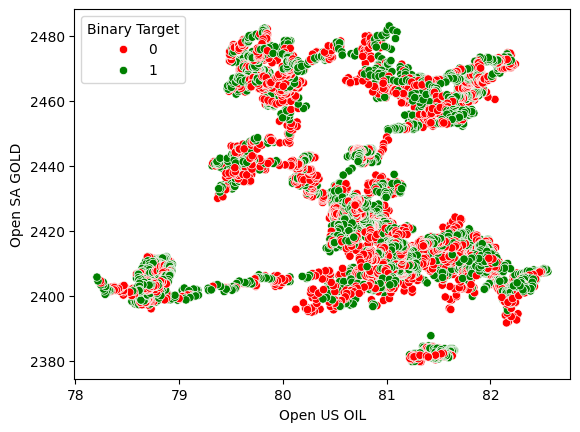

In [21]:
sns.scatterplot(data=merged_df,x="Open US OIL",y="Open SA GOLD",hue="Binary Target",palette=hue_colors)

<Axes: xlabel='Open US OIL', ylabel='Close'>

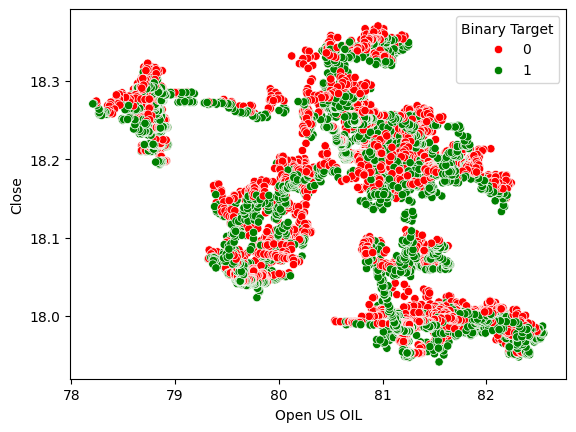

In [22]:
sns.scatterplot(data=merged_df,x="Open US OIL",y="Close",hue="Binary Target",palette=hue_colors)

<Axes: xlabel='Open SA GOLD', ylabel='Close'>

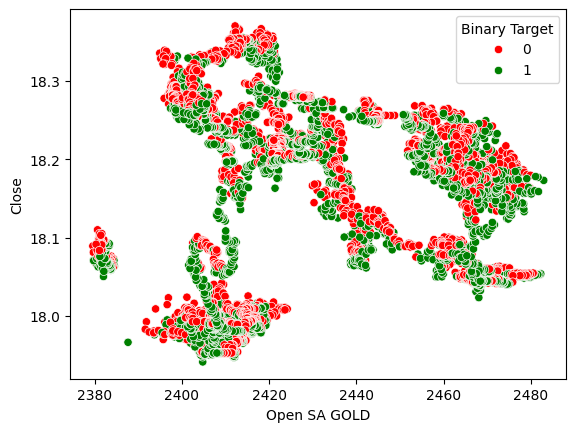

In [23]:
sns.scatterplot(data=merged_df,x="Open SA GOLD",y="Close",hue="Binary Target",palette=hue_colors)

In [24]:
#Reset the index
merged_df.reset_index(inplace=True)

In [108]:
#Import the libraries we need
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import RobustScaler

In [27]:
#Define the predictors
normal_predictors = ["Open","High","Low","Close"]
oil_gold_predictors = ["Open US OIL","High US OIL","Low US OIL","Close US OIL","Open SA GOLD","High SA GOLD","Low SA GOLD","Close SA GOLD"]
target = "Target"

In [28]:
#Scale the data
all_predictors = normal_predictors + oil_gold_predictors
scaler = RobustScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(merged_df.loc[:,all_predictors]),columns=all_predictors,index=np.arange(0,merged_df.shape[0]))

In [29]:
#Now prepare the models
models = [
    LinearRegression(),
    Lasso(),
    GradientBoostingRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    BaggingRegressor(),
    KNeighborsRegressor(),
    LinearSVR(),
    MLPRegressor(hidden_layer_sizes=(10,5),early_stopping=True),
    MLPRegressor(hidden_layer_sizes=(50,15),early_stopping=True)
]

columns = [
    "Linear Regression",
    "Lasso",
    "Gradient Boosting Regressor",
    "Random Forest Regressor",
    "AdaBoost Regressor",
    "Bagging Regressor",
    "KNeighbors Regressor",
    "Linear SVR",
    "Small Neural Network",
    "Large Neural Network"
]

In [30]:
#Prepare the time-series split object
splits = 10
tscv = TimeSeriesSplit(n_splits=splits,gap=look_ahead)

In [31]:
#Prepare the dataframes to store the error levels
normal_error = pd.DataFrame(columns=columns,index=np.arange(0,splits))
new_error = pd.DataFrame(columns=columns,index=np.arange(0,splits))

In [87]:
#First we iterate over all the models we have available
for j in np.arange(0,len(models)):
    #Now we have to perform cross validation with each model
    for i,(train,test) in enumerate(tscv.split(scaled_data)):
        #Get the data
        X_train = scaled_data.loc[train[0]:train[-1],oil_gold_predictors]
        X_test = scaled_data.loc[test[0]:test[-1],oil_gold_predictors]
        y_train = merged_df.loc[train[0]:train[-1],target]
        y_test = merged_df.loc[test[0]:test[-1],target]
        #Fit the model
        models[j].fit(X_train,y_train)
        #Measure the error
        new_error.iloc[i,j] = root_mean_squared_error(y_test,models[j].predict(X_test))

Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarn

In [86]:
normal_error

Linear Regression     Lasso Gradient Boosting Regressor  \
0          0.008246  0.029695                    0.010709   
1          0.007309  0.022064                    0.008618   
2          0.022711  0.199405                    0.204464   
3          0.011028  0.149178                    0.017912   
4          0.009373  0.030095                    0.015233   
5          0.013781  0.112858                    0.014686   
6          0.007882  0.109774                    0.008124   
7            0.0104  0.133645                    0.013605   
8           0.01106  0.197456                    0.041793   
9          0.011846  0.129645                    0.012154   

  Random Forest Regressor AdaBoost Regressor Bagging Regressor  \
0                0.011207           0.012218          0.012155   
1                0.009298           0.010399          0.009504   
2                0.205834           0.182972          0.204659   
3                0.022362           0.021077          0.024173   
4                 0.01704           0.023265          0.017465   
5                0.016004           0.018447          0.016777   
6                0.010572           0.010791           0.01208   
7                0.014599            0.01996           0.01474   
8                0.041063           0.060754          0.041115   
9                0.013669           0.014958           0.01438   

  KNeighbors Regressor Linear SVR Small Neural Network Large Neural Network  
0              0.01147   0.008349             1.653708              0.39786  
1             0.009475   0.007274             1.095589             0.020258  
2             0.195748   0.016569             9.640361             9.143144  
3             0.024062   0.011026             0.127062             0.043416  
4             0.014808   0.009685             0.381293             0.020338  
5             0.016058   0.014303             0.180686             0.028864  
6             0.011039   0.007948              0.03082             0.053194  
7              0.01392   0.010458             0.222775             0.024033  
8             0.041063    0.01107              0.73703             0.798162  
9             0.013489   0.011878            11.518218               0.0151

In [88]:
new_error

Linear Regression     Lasso Gradient Boosting Regressor  \
0           0.02945  0.029695                    0.015138   
1          0.038927  0.022064                    0.023771   
2          0.219691  0.199405                    0.201205   
3          0.102347  0.149178                    0.075164   
4          0.213861  0.030095                    0.039194   
5          0.161709  0.112858                    0.139363   
6          0.127025  0.109774                    0.125058   
7          0.111784  0.133645                    0.037997   
8          0.239978  0.197456                    0.190538   
9          0.095635  0.129645                    0.046427   

  Random Forest Regressor AdaBoost Regressor Bagging Regressor  \
0                0.018173           0.017174          0.020493   
1                0.027164           0.023297          0.024954   
2                0.196825            0.19732          0.197564   
3                   0.061           0.067649           0.06033   
4                 0.04422           0.047584          0.045625   
5                0.148317           0.132704          0.148524   
6                0.126937           0.042342          0.115578   
7                0.043696           0.052656          0.044354   
8                0.193785           0.195603          0.191376   
9                 0.03563           0.089551          0.039907   

  KNeighbors Regressor Linear SVR Small Neural Network Large Neural Network  
0             0.016916    0.03604            17.372619             2.247705  
1             0.026569   0.036112            15.718881             0.058112  
2             0.203782   0.223462             1.412148             0.126419  
3             0.075567   0.120936             0.918687              1.38041  
4             0.032702   0.180301             1.601389             0.944147  
5             0.093733   0.172985             0.243241             0.197133  
6             0.059559   0.178559             1.156654             0.777839  
7             0.045521   0.124828             0.192255             0.070301  
8             0.178651   0.301781             0.314098             1.064908  
9             0.036692   0.171348             0.040902             0.091203

In [98]:
#Let's see our average performance on the normal dataset
for i in (np.arange(0,normal_error.shape[0])):
    print(f"{models[i]} normal error {((normal_error.iloc[:,i].mean()))}")

LinearRegression() normal error 0.01136361865358375
Lasso() normal error 0.11138143304314707
GradientBoostingRegressor() normal error 0.03472997520534606
RandomForestRegressor() normal error 0.03616484012058101
AdaBoostRegressor() normal error 0.037484107657877755
BaggingRegressor() normal error 0.03670486223028821
KNeighborsRegressor() normal error 0.035113189373409175
LinearSVR() normal error 0.01085610361276552
MLPRegressor(early_stopping=True, hidden_layer_sizes=(10, 5)) normal error 2.558754334716706
MLPRegressor(early_stopping=True, hidden_layer_sizes=(50, 15)) normal error 1.0544369296125597


In [97]:
#Let's see our average performance on the new dataset
for i in (np.arange(0,normal_error.shape[0])):
    print(f"{models[i]} new error {((new_error.iloc[:,i].mean()))}")

LinearRegression() normal error 0.13404065973045615
Lasso() normal error 0.11138143304314707
GradientBoostingRegressor() normal error 0.0893855335909897
RandomForestRegressor() normal error 0.08957454602573789
AdaBoostRegressor() normal error 0.08658796789785872
BaggingRegressor() normal error 0.08887059320664067
KNeighborsRegressor() normal error 0.07696901077705855
LinearSVR() normal error 0.15463529064256165
MLPRegressor(early_stopping=True, hidden_layer_sizes=(10, 5)) normal error 3.8970873719426784
MLPRegressor(early_stopping=True, hidden_layer_sizes=(50, 15)) normal error 0.6958177634524169


In [99]:
#Let's see our average performance on the normal dataset
for i in (np.arange(0,normal_error.shape[0])):
    print(f"{models[i]} changed by {((normal_error.iloc[:,i].mean()-new_error.iloc[:,i].mean()))/normal_error.iloc[:,i].mean()}%")

LinearRegression() changed by -10.795596439535894%
Lasso() changed by 0.0%
GradientBoostingRegressor() changed by -1.573728690057642%
RandomForestRegressor() changed by -1.4768406476311784%
AdaBoostRegressor() changed by -1.3099914419240863%
BaggingRegressor() changed by -1.421221271695885%
KNeighborsRegressor() changed by -1.1920256220116057%
LinearSVR() changed by -13.244087580439862%
MLPRegressor(early_stopping=True, hidden_layer_sizes=(10, 5)) changed by -0.5230408480672479%
MLPRegressor(early_stopping=True, hidden_layer_sizes=(50, 15)) changed by 0.34010489967561475%


In [32]:
#Our best performing model was the KNeighbors Regressor
#Let us perform feature selection to test how stable the relationship is
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [33]:
#Let us select our best model
model = KNeighborsRegressor()

In [42]:
#Create the sequential selector object
sfs1 = SFS(
    model,
    k_features=(1,len(all_predictors)),
    forward=True,
    scoring="neg_mean_squared_error",
    cv=10,
    n_jobs=-1
)

In [44]:
#Fit the sequential selector
sfs1 = sfs1.fit(scaled_data.loc[:,all_predictors],merged_df.loc[:,"Target"])

In [45]:
#Now let us see which predictors were selected
sfs1.k_feature_names_

('Open', 'Low', 'Close')

In [51]:
#Now we will load the libraries we need
from sklearn.model_selection import RandomizedSearchCV

In [49]:
#Let us see if we can tune the model
#First we will create train test splits
train_X = scaled_data.loc[:(scaled_data.shape[0]//2),:]
train_y = merged_df.loc[:(merged_df.shape[0]//2),"Target"]

test_X = scaled_data.loc[(scaled_data.shape[0]//2):,:]
test_y = merged_df.loc[(merged_df.shape[0]//2):,"Target"]

In [83]:
#Create the tuning object
rs = RandomizedSearchCV(KNeighborsRegressor(n_jobs=-1),{
    "n_neighbors": [1,2,3,4,5,8,10,16,20,30,60,100],
    "weights":["uniform","distance"],
    "leaf_size":[1,2,3,4,5,10,15,20,40,60,90],
    "algorithm":["ball_tree","kd_tree"],
    "p":[1,2,3,4,5,6,7,8]
},cv=5,n_iter=500,return_train_score=False,scoring="neg_mean_squared_error")

In [84]:
#Let's perform the hyperparameter tuning
rs.fit(train_X,train_y)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(n_jobs=-1), n_iter=500,
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree'],
                                        'leaf_size': [1, 2, 3, 4, 5, 10, 15, 20,
                                                      40, 60, 90],
                                        'n_neighbors': [1, 2, 3, 4, 5, 8, 10,
                                                        16, 20, 30, 60, 100],
                                        'p': [1, 2, 3, 4, 5, 6, 7, 8],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_squared_error')

In [85]:
#Let's store the results from our hyperparameter tuning
tuning_results = pd.DataFrame(rs.cv_results_)
tuning_results.loc[:,["param_n_neighbors","param_weights","param_leaf_size","param_algorithm","param_p","mean_test_score"]].sort_values(by="mean_test_score",ascending=False)

param_n_neighbors param_weights param_leaf_size param_algorithm param_p  \
320                20       uniform              90         kd_tree       1   
29                 16       uniform               3       ball_tree       1   
278                16       uniform              40       ball_tree       1   
121                16       uniform              10         kd_tree       1   
98                 16       uniform               2       ball_tree       1   
..                ...           ...             ...             ...     ...   
480                 1      distance               5         kd_tree       7   
242                 1      distance               1       ball_tree       8   
332                 1      distance               2         kd_tree       8   
345                 1      distance              90         kd_tree       8   
264                 1       uniform               1         kd_tree       8   

     mean_test_score  
320        -0.001188  
29         -0.001196  
278        -0.001196  
121        -0.001196  
98         -0.001196  
..               ...  
480        -0.002677  
242        -0.002723  
332        -0.002723  
345        -0.002723  
264        -0.002723  

[500 rows x 6 columns]

In [75]:
#The best parameters we came across
rs.best_params_

{'weights': 'distance',
 'p': 1,
 'n_neighbors': 4,
 'leaf_size': 15,
 'algorithm': 'ball_tree'}

In [87]:
#Create instances of the default model and the custmoized model
default_model = KNeighborsRegressor()
customized_model = KNeighborsRegressor(p=rs.best_params_["p"],weights=rs.best_params_["weights"],n_neighbors=rs.best_params_["n_neighbors"],leaf_size=rs.best_params_["leaf_size"],algorithm=rs.best_params_["algorithm"])

In [109]:
#Measure the accuracy of the default model
default_model.fit(train_X,train_y)
root_mean_squared_error(test_y,default_model.predict(test_X))

0.06633226373900612

In [111]:
#Measure the accuracy of the customized model
customized_model.fit(train_X,train_y)
root_mean_squared_error(test_y,customized_model.predict(test_X))

0.04334616246844129

In [113]:
#Let's prepare to export the customized model to ONNX format
import onnx
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

In [155]:
#Train the model on all the data we have
#But before doing that we need to first scale the data in a way we can repeat in MQL5
scale_factors = pd.DataFrame(columns=all_predictors,index=["mean","standard deviation"])
for i in np.arange(0,len(all_predictors)):
    scale_factors.iloc[0,i] = merged_df.loc[:,all_predictors[i]].mean()
    scale_factors.iloc[1,i] = merged_df.loc[:,all_predictors[i]].std()
scale_factors

Open       High        Low      Close Open US OIL  \
mean                18.143605  18.145737  18.141569  18.143623   80.769567   
standard deviation   0.113016   0.113181   0.112887    0.11302    0.980241   

                   High US OIL Low US OIL Close US OIL Open SA GOLD  \
mean                 80.786445  80.752362    80.769235  2430.518038   
standard deviation    0.980794   0.980245     0.980596    26.397404   

                   High SA GOLD Low SA GOLD Close SA GOLD  
mean                 2430.87896  2430.15096   2430.520414  
standard deviation      26.4146   26.377606     26.395208

In [134]:
#Now we will write out the scale factors to CSV 
scale_factors.to_csv("/home/volatily/.wine/drive_c/Program Files/MetaTrader 5/MQL5/Files/usdzar_scale.csv")

In [156]:
for i in all_predictors:
    merged_df.loc[:,i] = (merged_df.loc[:,i] - merged_df.loc[:,i].mean()) / merged_df.loc[:,i].std()

In [157]:
merged_df

Open US OIL  High US OIL  Low US OIL  Close US OIL  \
Time                                                                      
2024.07.11 08:41:00     0.794124     0.783604    0.782088      0.779898   
2024.07.11 08:42:00     0.783923     0.796859    0.801471      0.811511   
2024.07.11 08:43:00     0.810447     0.793800    0.782088      0.764601   
2024.07.11 08:44:00     0.769640     0.772389    0.782088      0.790095   
2024.07.11 08:45:00     0.789023     0.772389    0.778008      0.770719   
...                          ...          ...         ...           ...   
2024.07.22 09:45:00    -2.575455    -2.585093   -2.587478     -2.578264   
2024.07.22 09:46:00    -2.574435    -2.585093   -2.567074     -2.582343   
2024.07.22 09:47:00    -2.579536    -2.595289   -2.597679     -2.603758   
2024.07.22 09:48:00    -2.604020    -2.615681   -2.596659     -2.608857   
2024.07.22 09:49:00    -2.614221    -2.620779   -2.618082     -2.624154   

                     Open SA GOLD  High SA GOLD  Low SA GOLD  Close SA GOLD  \
Time                                                                          
2024.07.11 08:41:00     -1.847077     -1.847424    -1.839855      -1.837092   
2024.07.11 08:42:00     -1.836849     -1.828495    -1.824311      -1.816254   
2024.07.11 08:43:00     -1.815635     -1.815623    -1.825448      -1.831409   
2024.07.11 08:44:00     -1.834197     -1.837202    -1.825448      -1.832545   
2024.07.11 08:45:00     -1.833060     -1.833795    -1.834926      -1.847321   
...                           ...           ...          ...            ...   
2024.07.22 09:45:00     -1.031845     -1.017201    -1.025148      -1.008153   
2024.07.22 09:46:00     -1.007979     -0.996758    -1.006193      -0.984664   
2024.07.22 09:47:00     -0.984492     -0.989186    -0.977760      -0.985422   
2024.07.22 09:48:00     -0.985250     -0.952843    -0.974348      -0.941096   
2024.07.22 09:49:00     -0.940927     -0.953978    -0.958046      -0.966100   

                         Open      High       Low     Close    Target  \
Time                                                                    
2024.07.11 08:41:00 -0.577838 -0.583467 -0.610068 -0.627527  18.07160   
2024.07.11 08:42:00 -0.628538 -0.644431 -0.669685 -0.660265  18.07230   
2024.07.11 08:43:00 -0.659242 -0.676238 -0.694223 -0.700081  18.07275   
2024.07.11 08:44:00 -0.699059 -0.670053 -0.719913 -0.711583  18.07100   
2024.07.11 08:45:00 -0.711447 -0.631884 -0.694223 -0.616379  18.07110   
...                       ...       ...       ...       ...       ...   
2024.07.22 09:45:00  1.059978  1.091724  1.072150  1.110219  18.27260   
2024.07.22 09:46:00  1.110413  1.154278  1.122997  1.137117  18.27010   
2024.07.22 09:47:00  1.137312  1.141025  1.153647  1.156406  18.27240   
2024.07.22 09:48:00  1.156601  1.143764  1.140891  1.126500  18.27390   
2024.07.22 09:49:00  1.126694  1.118318  1.136905  1.124819  18.27390   

                     Binary Target  
Time                                
2024.07.11 08:41:00              0  
2024.07.11 08:42:00              1  
2024.07.11 08:43:00              1  
2024.07.11 08:44:00              1  
2024.07.11 08:45:00              0  
...                            ...  
2024.07.22 09:45:00              1  
2024.07.22 09:46:00              0  
2024.07.22 09:47:00              0  
2024.07.22 09:48:00              1  
2024.07.22 09:49:00              1  

[9564 rows x 14 columns]

In [159]:
customized_model = KNeighborsRegressor(p=rs.best_params_["p"],weights=rs.best_params_["weights"],n_neighbors=rs.best_params_["n_neighbors"],leaf_size=rs.best_params_["leaf_size"],algorithm=rs.best_params_["algorithm"])
customized_model.fit(merged_df.loc[:,all_predictors],merged_df.loc[:,"Target"])

KNeighborsRegressor(algorithm='kd_tree', leaf_size=90, n_neighbors=20, p=1)

In [160]:
#Define the input shape and type
initial_type = [("float_tensor_type",FloatTensorType([1,train_X.shape[1]]))]

In [161]:
#Create an ONNX representation
onnx_model = convert_sklearn(customized_model,initial_types=initial_type)

In [162]:
#Store the ONNX model
onnx_model_name = "USDZAR_FLOAT_M1.onnx"
onnx.save_model(onnx_model,onnx_model_name)

In [1]:
#Let's visualize the model in netron
import netron

In [2]:
#Run netron
onnx_model_name = "USDZAR_FLOAT_M1.onnx"
netron.start(onnx_model_name)

Serving 'USDZAR_FLOAT_M1.onnx' at http://localhost:8080


('localhost', 8080)

----------------------------------------
Exception occurred during processing of request from ('127.0.0.1', 49416)
Traceback (most recent call last):
  File "C:\users\volatily\AppData\Local\Programs\Python\Python310\lib\socketserver.py", line 683, in process_request_thread
    self.finish_request(request, client_address)
  File "C:\users\volatily\AppData\Local\Programs\Python\Python310\lib\socketserver.py", line 360, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "C:\users\volatily\AppData\Local\Programs\Python\Python310\lib\socketserver.py", line 747, in __init__
    self.handle()
  File "C:\users\volatily\AppData\Local\Programs\Python\Python310\lib\http\server.py", line 427, in handle
    self.handle_one_request()
  File "C:\users\volatily\AppData\Local\Programs\Python\Python310\lib\http\server.py", line 415, in handle_one_request
    method()
  File "Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\netron\server.py", line 110, in 